### Workflow
1. Problem Definition
2. Data Collection
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Model Selection
6. Model Training
7. Model Evaluation
8. Model Optimization
9. Model Deployment
10. Monitoring and Maintenance
11. Documentation and Reporting
12. Feedback Loop

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

data = loadmat("D:\\IITRAM\\mat_file of one subject\\MPA_181221201409.mat")

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Feb 23 10:03:12 2022',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
      

In [3]:
ppgseg = data['ppgseg'][0, :]
label = data['labels'][0]

In [4]:
ppgseg[0]

0.3649857411446578

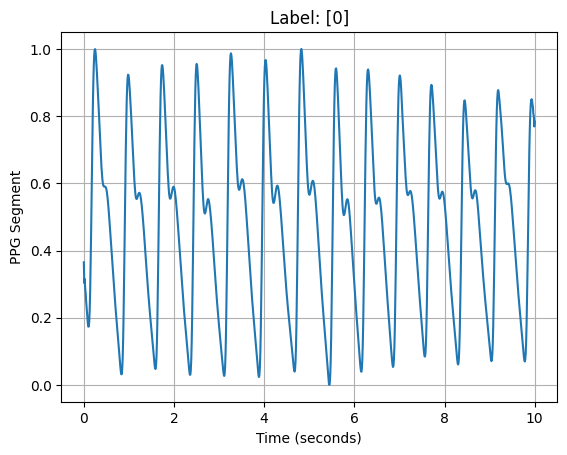

In [10]:
Fs = 100
total_time = 10 
time = np.linspace(0, total_time, len(ppgseg)) 
 
plt.plot(time, ppgseg)

plt.xlabel('Time (seconds)')
plt.ylabel('PPG Segment')
plt.title(f"Label: {str(label)}")

plt.grid(True)
plt.show()

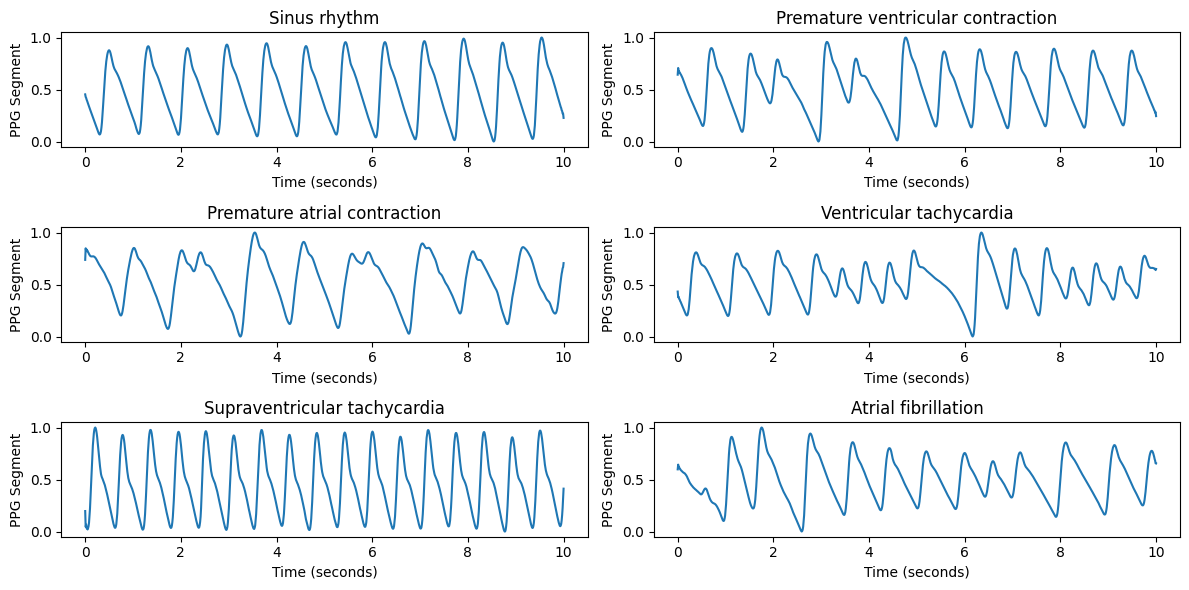

Unique labels and their counts:
0: 51
1: 25
2: 2
3: 10
4: 90
5: 21


In [2]:
data = loadmat('D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset\\MPA_181220181216.mat')
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
} 
ppgseg = data['ppgseg']
labels = data['labels'].flatten()

unique_labels, counts = np.unique(labels, return_counts=True)

rows = int((len(unique_labels) + 1) / 2)   
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  

plot_count = 0
for label, count in zip(unique_labels, counts):
    ppg_subset = ppgseg[labels == label]

    Fs = 100
    total_time = 10
    time = np.linspace(0, total_time, ppg_subset.shape[1])

    ax = axes.flat[plot_count]
    ax.plot(time, ppg_subset[0]) 
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('PPG Segment')

    mapped_title = label_map.get(label, f"Label: {label}")  
    ax.set_title(mapped_title)

    plot_count += 1 
for ax in axes.flat[plot_count:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

folder_path = "D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset"

label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}

all_results = defaultdict(list)

for filename in os.listdir(folder_path):
  if filename.endswith(".mat"):
    filepath = os.path.join(folder_path, filename)

    data = loadmat(filepath)
    ppgseg = data['ppgseg']
    labels = data['labels'].flatten()

    unique_labels, counts = np.unique(labels, return_counts=True)
     
    all_results["filename"].append(filename)
    for label, count in zip(unique_labels, counts):
      all_results[f"label_{label}"].append(count)

class_counts = {}
for label in all_results:
  if label.startswith("label_"):
    unique_label = int(label.split("_")[1])
    total_count = sum(all_results[label])
    class_counts[unique_label] = total_count

# Print unique labels and their counts
print("Unique labels and their counts (all files):")
for label, count in class_counts.items():
  print(f"{label_map[label]}: {count}")



Unique labels and their counts (all files):
Sinus rhythm: 14604
Premature ventricular contraction: 4425
Premature atrial contraction: 3773
Ventricular tachycardia: 2179
Supraventricular tachycardia: 5677
Atrial fibrillation: 16169


### Augmentation
> Augmentation Impact on Results: Augmentation should be applied thoughtfully. While it can improve model performance, it's crucial to ensure the generated data preserves the essential characteristics of the original data.

* Time-based Augmentation:

    - Time Warping: This technique stretches or compresses the time axis of the PPG signal. It can simulate heart rate variability, a crucial characteristic for arrhythmia detection. However, be mindful of excessive warping that might distort the underlying rhythm.

    - Time Shifting: Slightly shifting the PPG signal along the time axis can introduce variations in signal timing without significantly altering the overall shape.

* Noise Augmentation:

    - White Noise: Adding a small amount of white noise can simulate artifacts from sensor movement or environmental noise. However, excessive noise can obscure the underlying signal.

    - Baseline Wander: Simulate baseline wander by adding a slow-frequency sinusoidal wave to the signal. This can mimic physiological variations that might be present during data collection.

* Amplitude-based Augmentation:

    - Scaling: Scaling the PPG signal by a small factor (up or down) can introduce variations in signal amplitude while maintaining the overall shape.

    - Random Gain: Introduce small random variations in the gain applied to the signal to simulate changes in sensor placement or pressure.

* Other Techniques:

    - Mixing Signals: Combine segments from different PPG signals belonging to the same arrhythmia class. This can create variations while staying within the class characteristics. (Ensure the segments are compatible in terms of length and heart rate.)
    
* Important Considerations:

    - Balance Augmentation: Focus on augmenting the minority classes more aggressively to achieve a more balanced dataset.

    - Domain Knowledge: Understand the impact of each augmentation technique on the physiological meaning of the PPG signal.
    
    - Validation: Evaluate the effectiveness of augmentation by comparing the performance of models trained with and without augmentation on a held-out validation set.

In [7]:
class_counts

{0: 14604, 1: 4425, 2: 3773, 3: 2179, 4: 5677, 5: 16169}

1. time_warping:
Uses scipy.signal.resample to change the length of the signal by a random warp factor.

2. time_shifting:
Shifts the signal left or right by a random number of samples within a specified range, simulating shifts in time.

3. add_baseline_wander:
Adds a low-frequency sinusoidal component to the signal to simulate baseline wander, which can occur due to motion artifacts or breathing.

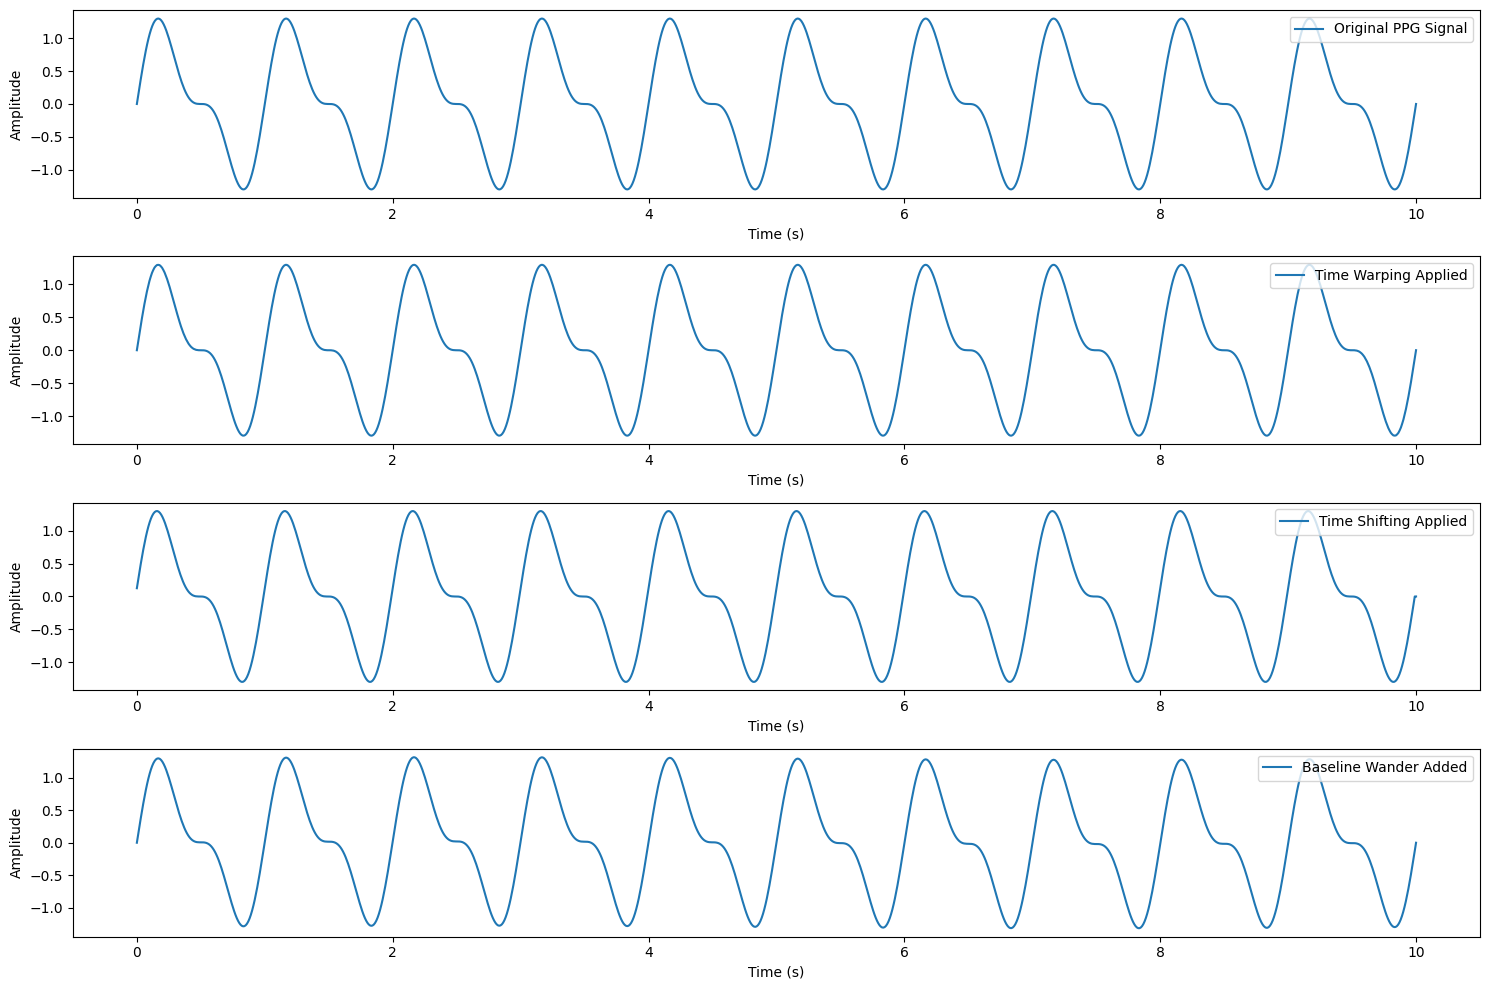

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
 
Fs = 100 
total_time = 10
t = np.linspace(0, total_time, int(Fs * total_time)) 
 
ppg_signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 2 * t)  
 
def time_warping(signal, warp_factor_range=(0.95, 1.05)):
    warp_factor = np.random.uniform(*warp_factor_range)
    return signal.resample(signal, int(len(signal) * warp_factor))

def time_shifting(signal, shift_range=(-3, 3)):
    shift = np.random.randint(shift_range[0], shift_range[1])
    return np.roll(signal, shift)

def add_baseline_wander(signal, amplitude=0.02, frequency=0.1):
    baseline = amplitude * np.sin(2 * np.pi * frequency * np.arange(len(signal)) / Fs)
    return signal + baseline

augmented_signal_warped = signal.resample(ppg_signal, int(len(ppg_signal) * np.random.uniform(0.95, 1.05)))

augmented_signal_shifted = time_shifting(ppg_signal)

augmented_signal_baseline = add_baseline_wander(ppg_signal)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, ppg_signal, label='Original PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(np.linspace(0, total_time, len(augmented_signal_warped)), augmented_signal_warped, label='Time Warping Applied')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, augmented_signal_shifted, label='Time Shifting Applied')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, augmented_signal_baseline, label='Baseline Wander Added')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


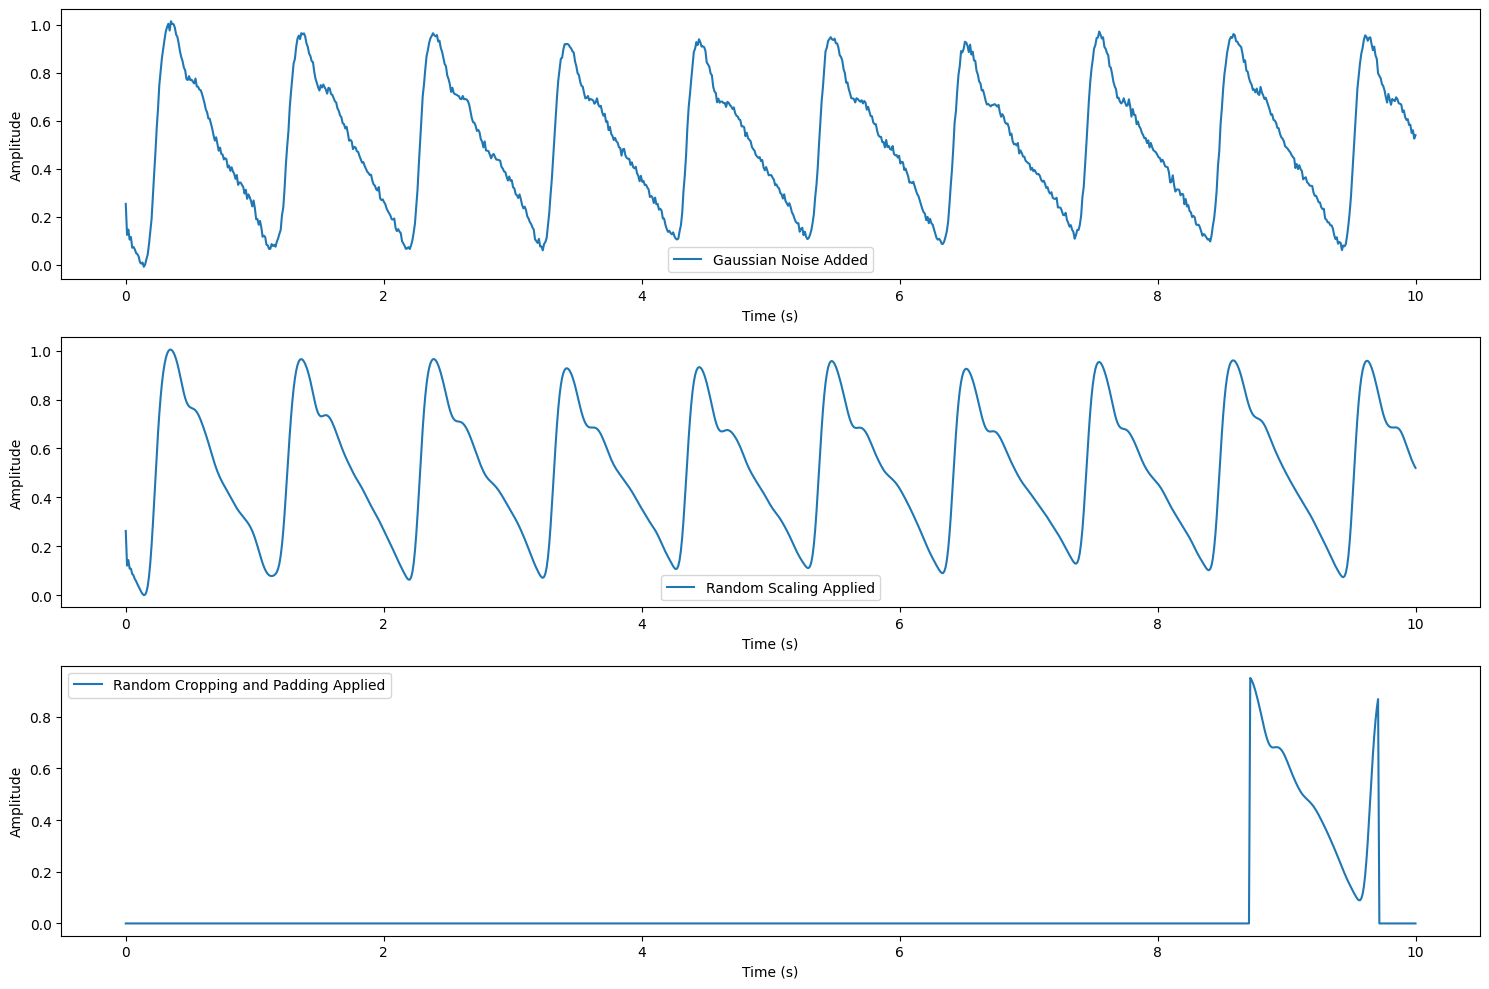

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Fs = 100 
total_time = 10
t = np.linspace(0, total_time, int(Fs * total_time)) 

ppg_signal = data['ppgseg'][1]

def add_gaussian_noise(signal, noise_level=0.01):
    noise = noise_level * np.random.randn(len(signal))
    return signal + noise

def random_scaling(signal, scale_range=(0.98, 1.02)):
    scale_factor = np.random.uniform(*scale_range)
    return signal * scale_factor

def random_cropping(signal, crop_ratio=0.1):
    crop_length = int(len(signal) * crop_ratio)
    start = np.random.randint(0, len(signal) - crop_length)
    cropped_signal = signal[start:start + crop_length]
    pad_before = np.random.randint(0, len(signal) - len(cropped_signal))
    pad_after = len(signal) - len(cropped_signal) - pad_before
    return np.pad(cropped_signal, (pad_before, pad_after), 'constant', constant_values=0)

augmented_signal_noise = add_gaussian_noise(ppg_signal)

augmented_signal_scaled = random_scaling(ppg_signal)

augmented_signal_cropped = random_cropping(ppg_signal)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(t, augmented_signal_noise, label='Gaussian Noise Added')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, augmented_signal_scaled, label='Random Scaling Applied')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, augmented_signal_cropped, label='Random Cropping and Padding Applied')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


### Augmenting One PPG Signal

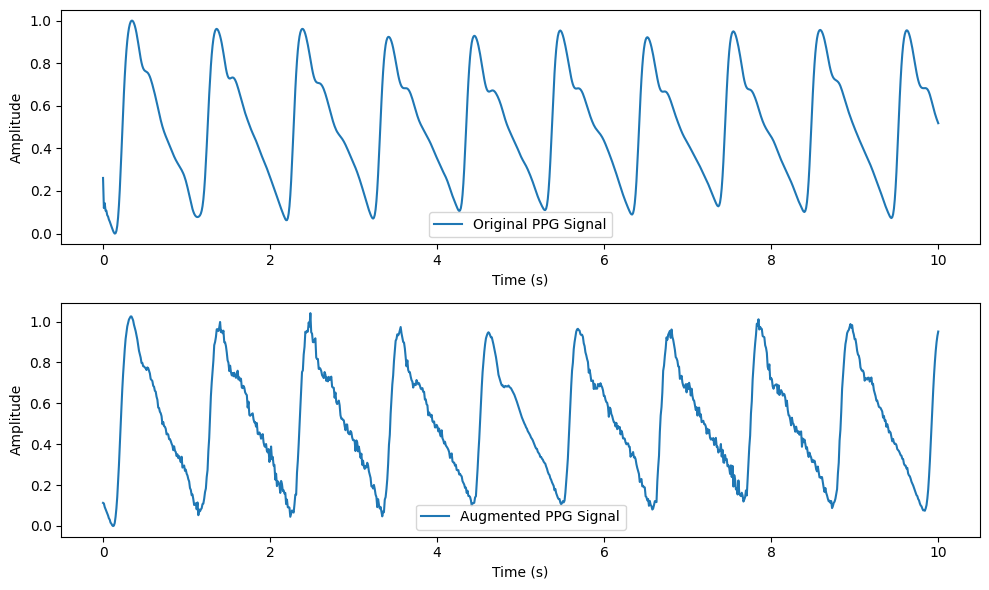

In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Fs = 100 
total_time = 10
t = np.linspace(0, total_time, int(Fs * total_time)) 

ppg_signal = data['ppgseg'][1]
 
def augment_signal(ppg_signal, min_length=1000):
    while True:
        time_warping_factor = np.random.uniform(0.95, 1.05)
        warped_signal = signal.resample(ppg_signal, int(len(ppg_signal) * time_warping_factor))

        time_shift = np.random.randint(-3, 3)
        shifted_signal = np.roll(warped_signal, time_shift)

        if len(shifted_signal) >= min_length:
            break

    shifted_signal = shifted_signal[:min_length]

    baseline_wander = np.sin(np.linspace(0, 2*np.pi, min_length)) * 0.02
    noisy_signal = shifted_signal + baseline_wander * np.random.randn(min_length)

    scale_factor = np.random.uniform(0.98, 1.02)
    augmented_signal = noisy_signal * scale_factor

    return augmented_signal

augmented_signal = augment_signal(ppg_signal)

# Plotting the signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, ppg_signal, label='Original PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:1000], augmented_signal, label='Augmented PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


### Augmenting First 2179 data in each categories and then storing them in a file

In [11]:
!pip list | grep torch

torch                         2.2.0
torch2tflite                  1.0.0
torchaudio                    2.2.0
torchsummary                  1.5.1
torchvision                   0.17.0


#### Inporting required Libraries

In [12]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from collections import defaultdict
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical

#### Function to augment the PPG signal

In [13]:
def augment_signal(ppg_signal, min_length=1000):
    while True:
        time_warping_factor = np.random.uniform(0.95, 1.05)
        warped_signal = signal.resample(ppg_signal, int(len(ppg_signal) * time_warping_factor))

        time_shift = np.random.randint(-3, 3)
        shifted_signal = np.roll(warped_signal, time_shift)

        if len(shifted_signal) >= min_length:
            break

    shifted_signal = shifted_signal[:min_length]

    baseline_wander = np.sin(np.linspace(0, 2*np.pi, min_length)) * 0.02
    noisy_signal = shifted_signal + baseline_wander * np.random.randn(min_length)

    scale_factor = np.random.uniform(0.98, 1.02)
    augmented_signal = noisy_signal * scale_factor

    return augmented_signal

#### Define dataset paths and classes

In [ ]:
folder_path = "D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset"
output_dir = 'augmented_data'
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    for cls in label_map.values():
        os.makedirs(os.path.join(output_dir, cls))

#### Process and augment data

In [ ]:
all_results = defaultdict(list)
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        filepath = os.path.join(folder_path, filename)
        data = scipy.io.loadmat(filepath)
        ppgseg = data['ppgseg']
        labels = data['labels'].flatten()
        
        unique_labels, counts = np.unique(labels, return_counts=True)
        all_results["filename"].append(filename)
        for label, count in zip(unique_labels, counts):
            all_results[f"label_{label}"].append(count)
        
        for i, (segment, label) in enumerate(zip(ppgseg, labels)):
            if i < 2179:  # Taking first 2179 data points from each class
                class_name = label_map[label]
                np.save(os.path.join(output_dir, class_name, f"{class_name}_{i}.npy"), segment)
                augmented_segment = augment_signal(segment)
                np.save(os.path.join(output_dir, class_name, f"{class_name}_{i}_aug.npy"), augmented_segment)


#### Load data for training

In [ ]:
def load_data(data_dir, classes, num_samples_per_class):
    signals = []
    labels = []
    for cls_index, cls in classes.items():
        cls_dir = os.path.join(data_dir, cls)
        files = os.listdir(cls_dir)[:num_samples_per_class*2]   

        for file in files:
            signal = np.load(os.path.join(cls_dir, file))
            signals.append(signal)
            labels.append(cls_index)
    
    return np.array(signals), np.array(labels)

classes = {v: k for k, v in label_map.items()}  
X, y = load_data(output_dir, classes, 2179)

 
X = X.reshape(X.shape[0], X.shape[1], 1)

y = to_categorical(y, num_classes=len(label_map))

#### Simple Conv1D model

In [ ]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Training

In [ ]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Hjorth parameters

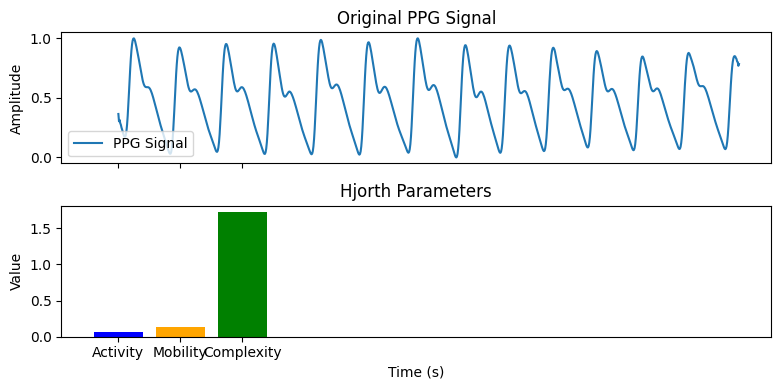

Activity: 0.069612171045368
Mobility: 0.13404109963225155
Complexity: 1.7263465879500208


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def hjorth_parameters(signal):

    # First derivative of the signal
    dx = np.diff(signal)
    
    # Second derivative of the signal
    ddx = np.diff(dx)
    
    # Activity: variance of the signal
    activity = np.var(signal)
    
    # Mobility: sqrt(var(derivative) / var(signal))
    mobility = np.sqrt(np.var(dx) / activity)
    
    # Complexity: sqrt(var(second_derivative) / var(derivative)) / Mobility
    complexity = np.sqrt(np.var(ddx) / np.var(dx)) / mobility
    
    return activity, mobility, complexity


ppg_signal = ppgseg

# Calculate Hjorth parameters
activity, mobility, complexity = hjorth_parameters(ppg_signal)

# Plot the original PPG signal and Hjorth parameters
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Plot original PPG signal
axs[0].plot(t, ppg_signal, label='PPG Signal')
axs[0].set_title('Original PPG Signal')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot Hjorth parameters
hjorth_values = [activity, mobility, complexity]
hjorth_labels = ['Activity', 'Mobility', 'Complexity']
axs[1].bar(hjorth_labels, hjorth_values, color=['blue', 'orange', 'green'])
axs[1].set_title('Hjorth Parameters')
axs[1].set_ylabel('Value')

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

print(f'Activity: {activity}')
print(f'Mobility: {mobility}')
print(f'Complexity: {complexity}')


## **Ploting Different parameters from PPG Signal**

In [4]:
# import numpy as np

def hjorth_parameters(signal):
    """Compute Hjorth parameters: Activity, Mobility, and Complexity."""
    activity = np.var(signal)
    mobility = np.sqrt(np.var(np.diff(signal)) / activity)
    complexity = np.sqrt(np.var(np.diff(np.diff(signal))) / np.var(np.diff(signal))) / mobility
    return activity, mobility, complexity


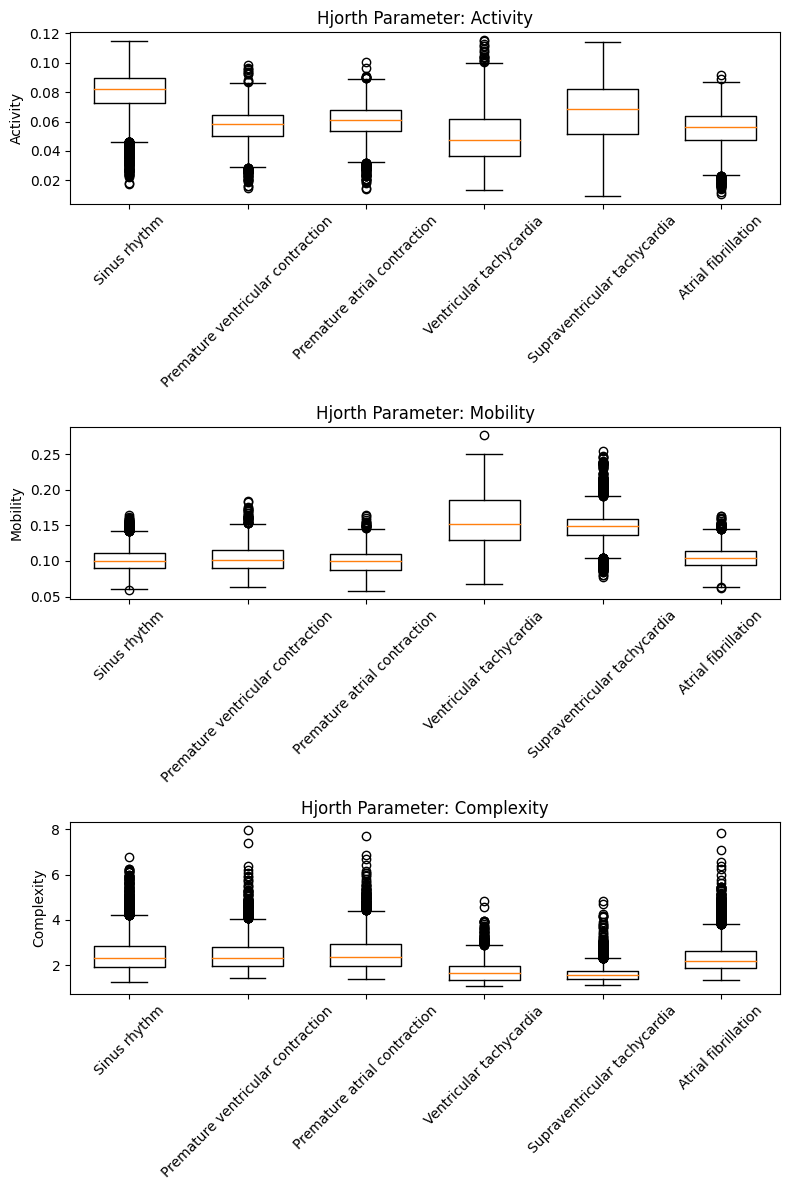

In [6]:
import os
import scipy.io
from collections import defaultdict

# Define dataset paths and classes
folder_path = "D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset"
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}

hjorth_data = defaultdict(list)
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        filepath = os.path.join(folder_path, filename)
        data = scipy.io.loadmat(filepath)
        ppgseg = data['ppgseg']
        labels = data['labels'].flatten()
        
        for segment, label in zip(ppgseg, labels):
            class_name = label_map[label]
            activity, mobility, complexity = hjorth_parameters(segment)
            hjorth_data[class_name].append((activity, mobility, complexity))

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, param in enumerate(['Activity', 'Mobility', 'Complexity']):
    ax = axs[i]
    for class_name in label_map.values():
        param_values = [x[i] for x in hjorth_data[class_name]]
        ax.boxplot(param_values, positions=[list(label_map.values()).index(class_name) + 1], widths=0.6)
    ax.set_xticks(range(1, len(label_map) + 1))
    ax.set_xticklabels(label_map.values(), rotation=45)
    ax.set_title(f'Hjorth Parameter: {param}')
    ax.set_ylabel(param)

plt.tight_layout()
plt.show()


**Box Plot:** A box plot provides a summary of distribution of Data, It consists of several components:

- Box: The box represents the interquartile range (IQR), which is the middle 50% of the data. The bottom (Q1) and top (Q3) edges of the box indicate the first and third quartiles, respectively. The length of the box represents the spread of the middle 50% of the data.

- Median: A line inside the box represents the median of the dataset, which is the middle value when the data is sorted in ascending order.

- Whiskers: The whiskers extend from the edges of the box to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively. Outliers beyond the whiskers are sometimes plotted individually as points.

- Outliers: Individual data points that fall outside the whiskers are plotted as individual points. These points are considered to be potential anomalies or extreme values.

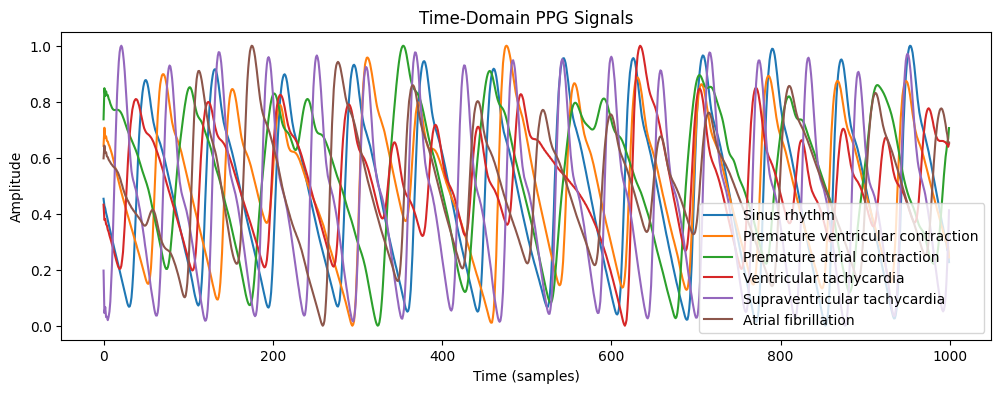

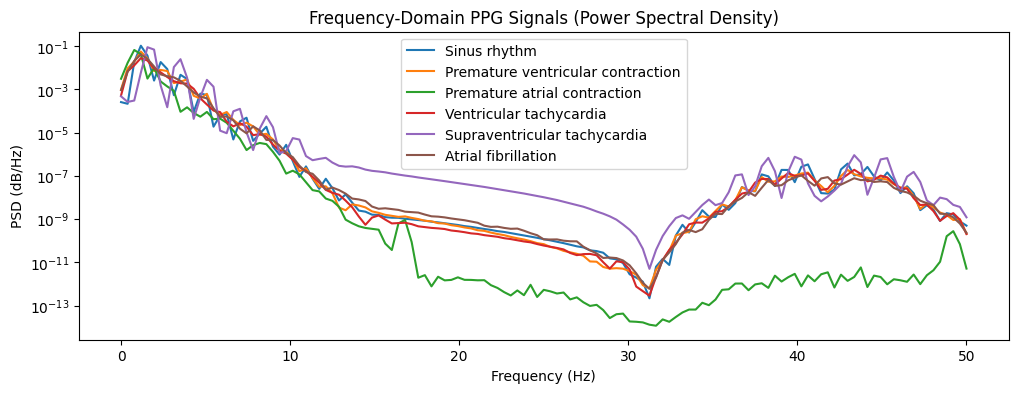

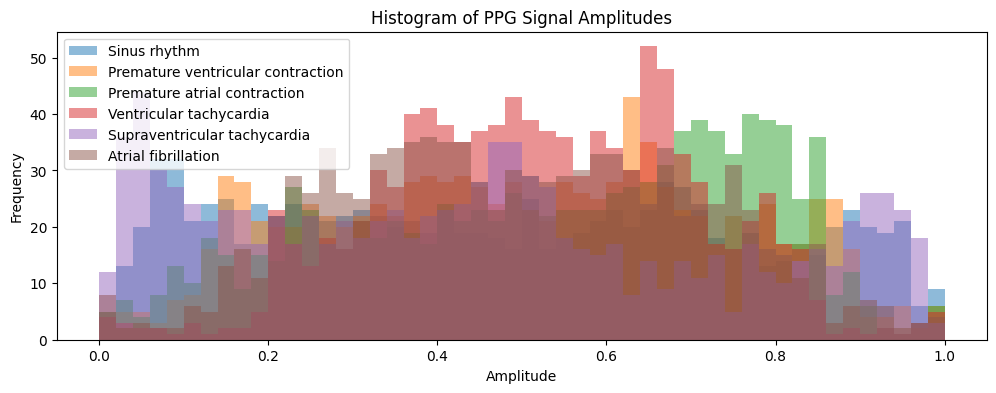

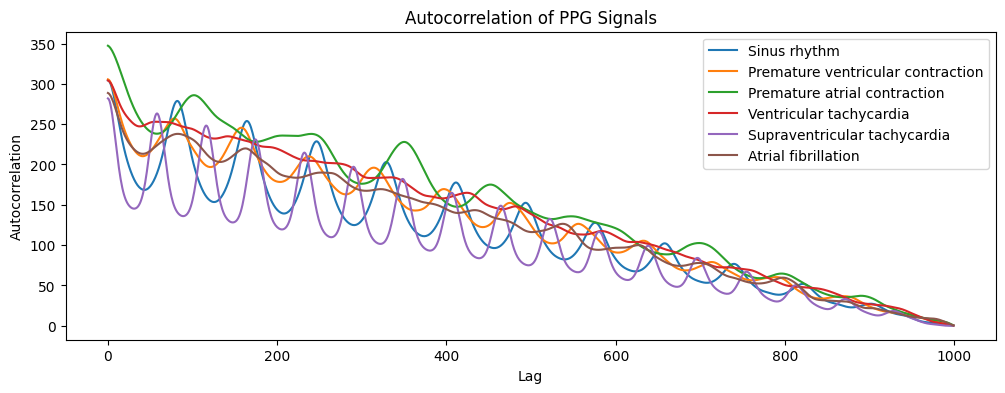

In [14]:
from scipy.signal import welch

folder_path = "D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset"
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}

ppg_data = defaultdict(list)
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        filepath = os.path.join(folder_path, filename)
        data = scipy.io.loadmat(filepath)
        ppgseg = data['ppgseg']
        labels = data['labels'].flatten()
        
        for segment, label in zip(ppgseg, labels):
            class_name = label_map[label]
            ppg_data[class_name].append(segment)

# Plot time-domain signal
plt.figure(figsize=(12, 4))
for class_name in label_map.values():
    if ppg_data[class_name]:
        plt.plot(ppg_data[class_name][0], label=class_name)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Time-Domain PPG Signals')
plt.legend()
plt.show()

# Plot frequency-domain (Power Spectral Density)
plt.figure(figsize=(12, 4))
for class_name in label_map.values():
    if ppg_data[class_name]:
        f, Pxx = welch(ppg_data[class_name][0], fs=100, nperseg=256)
        plt.semilogy(f, Pxx, label=class_name)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.title('Frequency-Domain PPG Signals (Power Spectral Density)')
plt.legend()
plt.show()

# Plot histogram of signal amplitudes
plt.figure(figsize=(12, 4))
for class_name in label_map.values():
    if ppg_data[class_name]:
        plt.hist(ppg_data[class_name][0], bins=50, alpha=0.5, label=class_name)
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of PPG Signal Amplitudes')
plt.legend()
plt.show()

# Plot autocorrelation of signals
plt.figure(figsize=(12, 4))
for class_name in label_map.values():
    if ppg_data[class_name]:
        autocorr = np.correlate(ppg_data[class_name][0], ppg_data[class_name][0], mode='full')
        autocorr = autocorr[autocorr.size // 2:]
        plt.plot(autocorr, label=class_name)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of PPG Signals')
plt.legend()
plt.show()


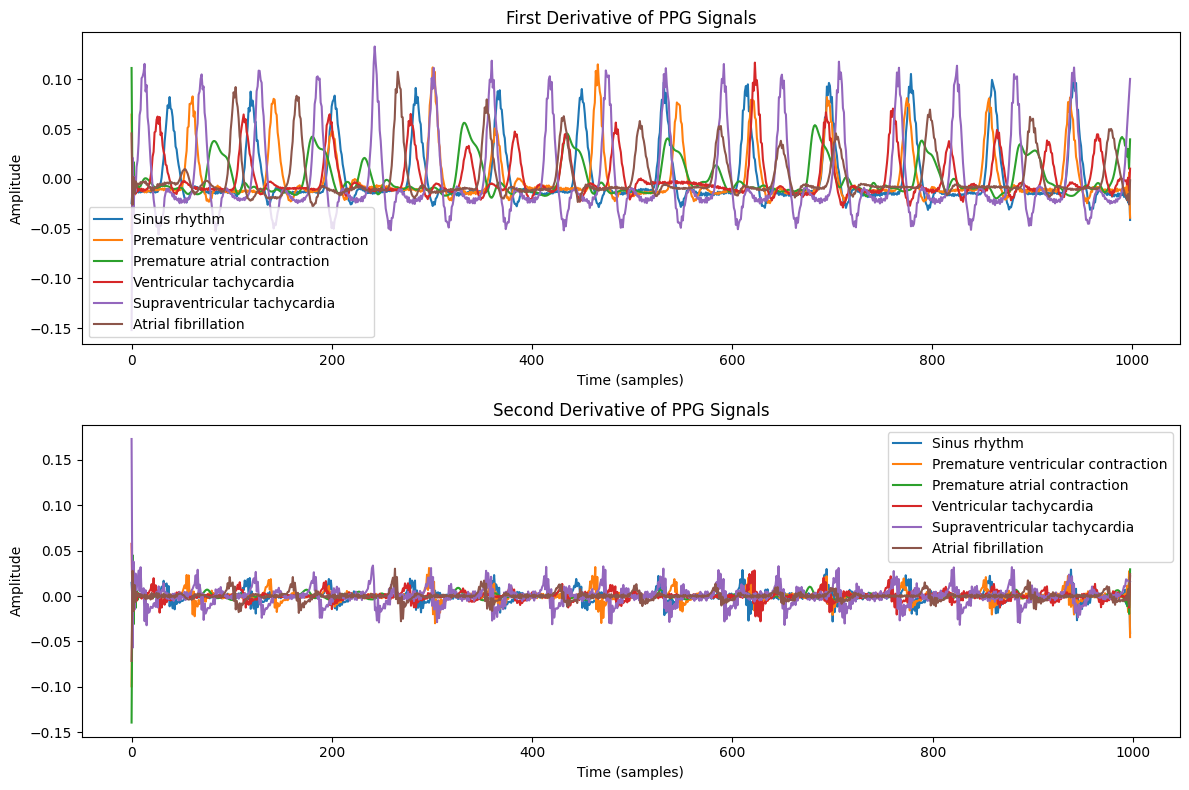

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

for class_name in label_map.values():
    if ppg_data[class_name]:
        original_signal = ppg_data[class_name][0]
        first_derivative = np.diff(original_signal)
        second_derivative = np.diff(first_derivative)
        
        # Plot first derivative
        axs[0].plot(first_derivative, label=class_name)
        
        # Plot second derivative
        axs[1].plot(second_derivative, label=class_name)

axs[0].set_title('First Derivative of PPG Signals')
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].set_title('Second Derivative of PPG Signals')
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.tight_layout()
plt.show()


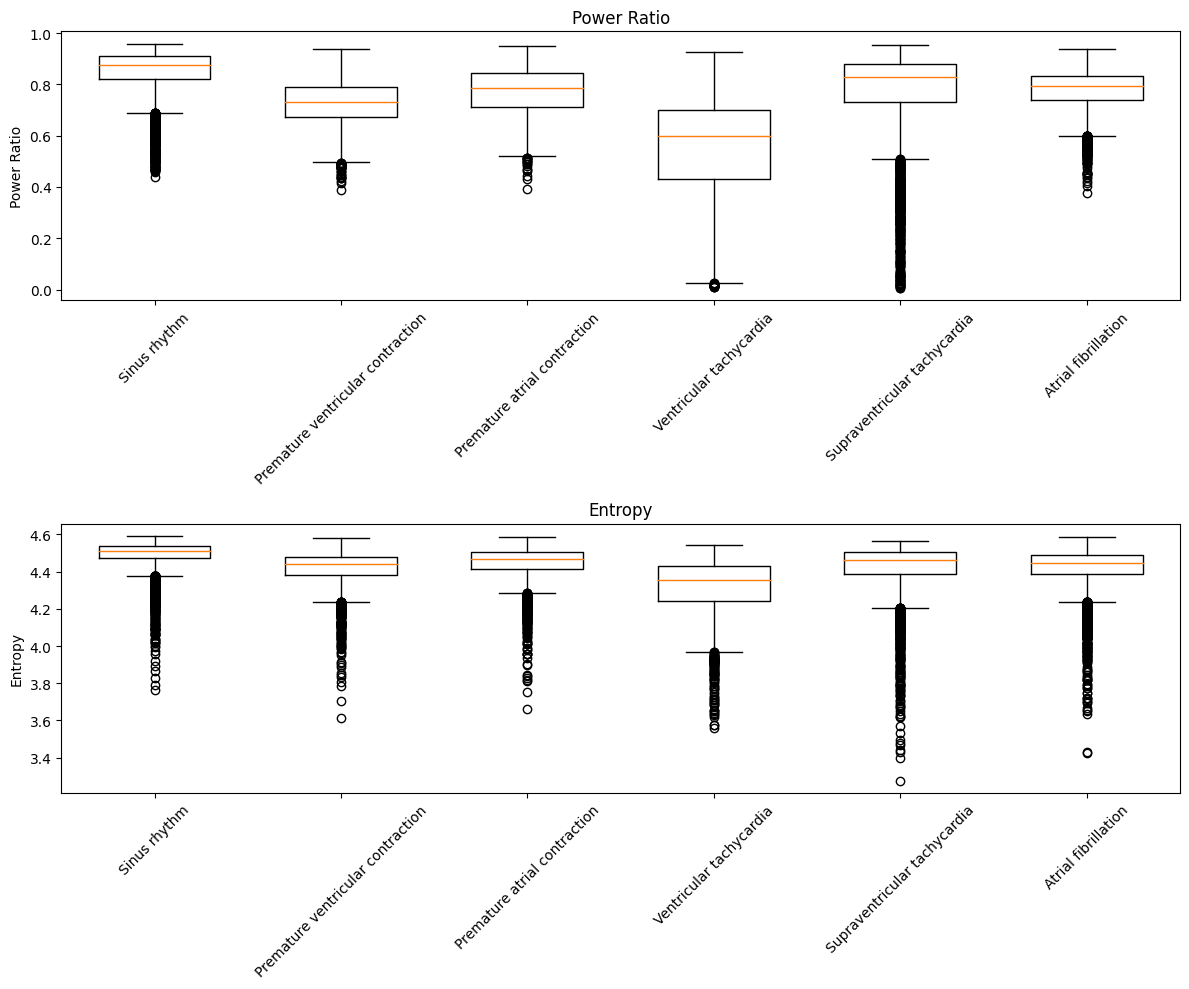

In [26]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from scipy.stats import entropy

# Define dataset paths and classes
folder_path = "D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset"
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}

# Load data and store signals
ppg_data = defaultdict(list)
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        filepath = os.path.join(folder_path, filename)
        data = scipy.io.loadmat(filepath)
        ppgseg = data['ppgseg']
        labels = data['labels'].flatten()
        
        for segment, label in zip(ppgseg, labels):
            class_name = label_map[label]
            ppg_data[class_name].append(segment)

# Function to calculate Power Ratio
def power_ratio(signal, low_freq, high_freq, fs=100):
    f, Pxx = welch(signal, fs=fs)
    total_power = np.trapz(Pxx, f)
    band_power = np.trapz(Pxx[(f >= low_freq) & (f <= high_freq)], f[(f >= low_freq) & (f <= high_freq)])
    return band_power / total_power

# Function to calculate Entropy
def calculate_entropy(signal):
    hist, _ = np.histogram(signal, bins=100, density=True)
    return entropy(hist)

# Calculate statistical parameters
stats_data = defaultdict(lambda: defaultdict(list))

for class_name, signals in ppg_data.items():
    for signal in signals:
        stats_data[class_name]['Power Ratio'].append(power_ratio(signal, 0.5, 3))
        stats_data[class_name]['Entropy'].append(calculate_entropy(signal))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

for i, stat in enumerate(['Power Ratio', 'Entropy']):
    ax = axs[i]
    for class_name in label_map.values():
        ax.boxplot(stats_data[class_name][stat], positions=[list(label_map.values()).index(class_name) + 1], widths=0.6)
    ax.set_xticks(range(1, len(label_map) + 1))
    ax.set_xticklabels(label_map.values(), rotation=45)
    ax.set_title(stat)
    ax.set_ylabel(stat)

plt.tight_layout()
plt.show()


C:\Users\VIVEK KUMAR\AppData\Local\Temp\ipykernel_9884\1580898137.py:59: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


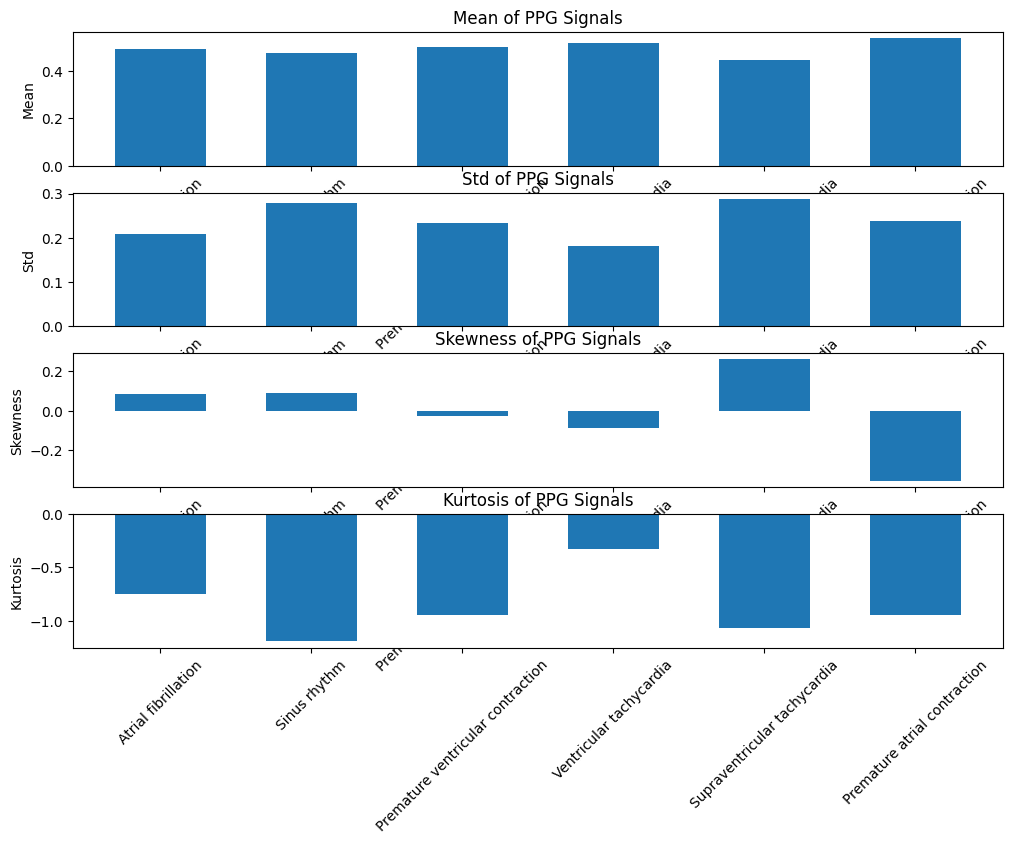

In [25]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import skew, kurtosis
from scipy.signal import welch

# Define dataset paths and classes
folder_path = "D:\\IITRAM\\PPGArrhythmiaDetection-main\\valid_testDataset"
label_map = {
    0: "Sinus rhythm",
    1: "Premature ventricular contraction",
    2: "Premature atrial contraction",
    3: "Ventricular tachycardia",
    4: "Supraventricular tachycardia",
    5: "Atrial fibrillation"
}

# Load data and compute features for one signal in each class
features_data = defaultdict(dict)
for filename in os.listdir(folder_path):
    if filename.endswith(".mat"):
        filepath = os.path.join(folder_path, filename)
        data = scipy.io.loadmat(filepath)
        ppgseg = data['ppgseg']
        labels = data['labels'].flatten()

        # Collect one segment per class
        collected_classes = set(features_data.keys())
        required_classes = set(label_map.values())
        if collected_classes == required_classes:
            break

        for segment, label in zip(ppgseg, labels):
            class_name = label_map[label]
            if class_name not in features_data:
                features_data[class_name]['Mean'] = np.mean(segment)
                features_data[class_name]['Std'] = np.std(segment)
                features_data[class_name]['Skewness'] = skew(segment)
                features_data[class_name]['Kurtosis'] = kurtosis(segment)
                 

# Prepare data for plotting
feature_names = ['Mean', 'Std', 'Skewness', 'Kurtosis']
class_names = list(features_data.keys())
num_features = len(feature_names)

# Plot features for each class
fig, axs = plt.subplots(num_features, 1, figsize=(12, 8))
for i, feature in enumerate(feature_names):
    values = [features_data[class_name][feature] for class_name in class_names]
    axs[i].bar(class_names, values, width=0.6)
    axs[i].set_title(f'{feature} of PPG Signals')
    axs[i].set_ylabel(feature)
    axs[i].set_xticks(range(len(class_names)))
    axs[i].set_xticklabels(class_names, rotation=45)

plt.tight_layout()
plt.show()
